In [33]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'Palatino'
fig_path = r'/Users/leonbecker/Library/CloudStorage/OneDrive-UniversitätWürzburg/Universität Würzburg/Master Information-Systems/Thesis/Abbildungen'

In [60]:
wine_type_ids = {
    1: 'red',
    2: 'white',
    3: 'sparkling_wine',
    4: 'rose',
    24: 'liqueur_wine',
    7: 'dessert_wine'
}

In [58]:
con = sqlite3.connect('wine_distinct.db')
cur = con.cursor()
df_wine = pd.read_sql_query("SELECT * from wine_distinct", con)
df_wine.head()

,index,id,name,price,type_id,is_natural,winemaker,region,country,grapes,average_rating,acidity,fizziness,intensity,sweetness,tannin,user_structure_count,has_valid_ratings
0,0,618,Chardonnay,16.50,2,0,Bogle,California,United States,Chardonnay,3.8,3.094569,NaN,4.712154,2.831320,NaN,502.0,1
1,1,1151,Brut (Chardonnay - Pinot Noir),16.90,3,0,Graham Beck,Robertson,South Africa,None,3.8,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,1155,Brut Rosé (Chardonnay - Pinot Noir),23.85,4,0,Graham Beck,Robertson,South Africa,None,3.9,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,1156,Brut Blanc De Blancs,23.70,3,0,Graham Beck,Robertson,South Africa,None,3.8,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4,1208,Grandi Annate Vino Nobile di Montepulciano,78.00,1,0,Avignonesi,Vino Nobile di Montepulciano,Italy,"Sangiovese, Canaiolo Nero",4.3,3.916932,NaN,3.479001,1.519183,3.602611,24.0,1


In [61]:
for index in df_wine.index:
    df_wine.at[index, 'type_name'] = wine_type_ids[df_wine.loc[index, 'type_id']]

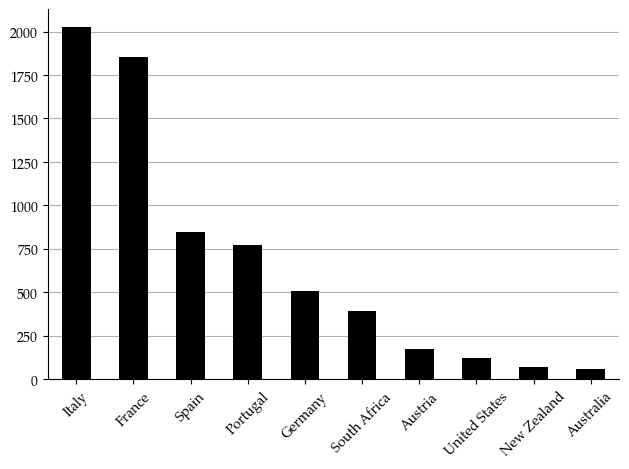

In [112]:
ax = df_wine.country.value_counts().head(n=10).plot(
    kind='bar',
    color='black',
    zorder=3
)
plt.grid(zorder=0, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(fig_path + '/top_10_producer_countries.pdf')

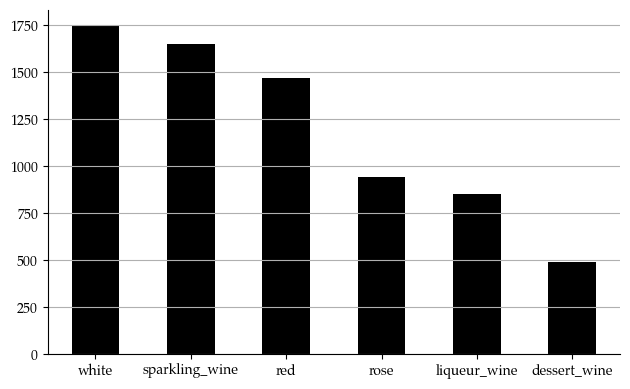

In [49]:
ax = df_wine.type_name.value_counts().plot(
    kind='bar',
    color='black'
)
plt.grid(axis='y')
plt.tight_layout()
plt.xticks(rotation=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(fig_path + '/wine_type_distribution.pdf')

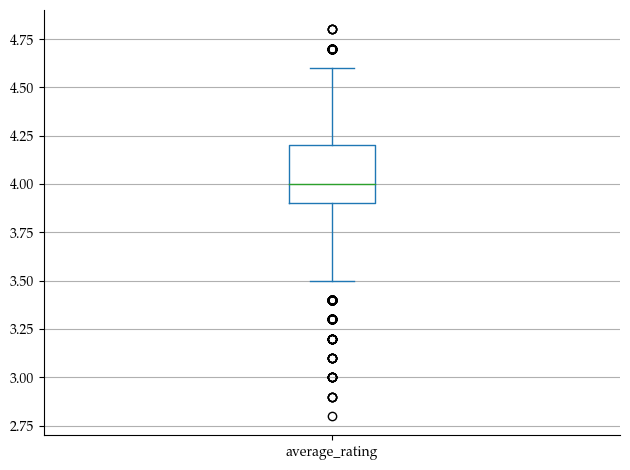

In [52]:
ax = df_wine.average_rating.plot(
    kind='box'
)
plt.grid(axis='y')
plt.tight_layout()
plt.xticks(rotation=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(fig_path + '/average_rating.pdf')

In [80]:
top_10_countries = df_wine.country.value_counts().head(n=10).index

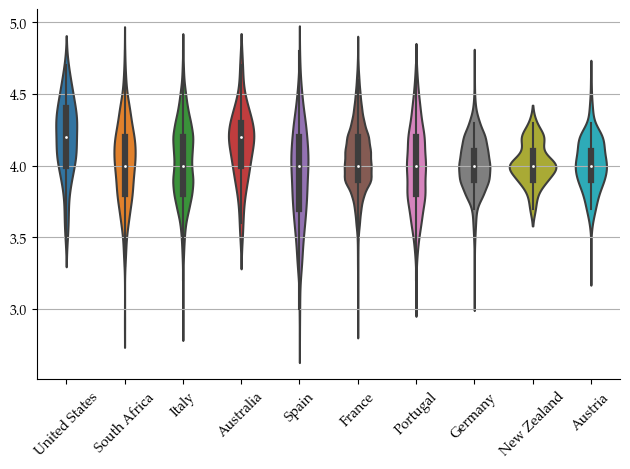

In [109]:
plt.grid(zorder=0)
ax = sb.violinplot(
    data=df_wine[df_wine.country.isin(top_10_countries)],
    y='average_rating',
    x='country',
    #palette=['w','w','w','w', 'w','w','w','w', 'w', 'w'],
    zorder=3
)
# plt.grid(axis='y')
plt.xticks(rotation=45)
plt.ylabel(None)
plt.xlabel(None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig(fig_path + '/top_10_ratings_for_countries.pdf')

In [4]:
con_rev = sqlite3.connect('review.db')
df_rev = pd.read_sql_query("SELECT * from review", con_rev)
df_rev.head()

,index,id,wine_id,rating,note,created_at,likes_count,comments_count,scan_image_path,user_id
0,0,167598541,618,4.0,"Yeast, apple, oak, vegetal,cream cheese, straw...",2020-06-20T08:29:48.000Z,0.0,0.0,images.vivino.com/thumbs/nxLdBc-oS7Gy7MhhcdNot...,19730641
1,1,144384202,618,4.0,Notes of \nOak citrus apple cheese cream\nVani...,2019-11-18T00:42:42.000Z,7.0,0.0,images.vivino.com/thumbs/nxLdBc-oS7Gy7MhhcdNot...,30809658
2,2,163780681,618,4.0,I really think this a great wine for the price...,2020-05-16T15:50:49.000Z,3.0,0.0,images.vivino.com/thumbs/nxLdBc-oS7Gy7MhhcdNot...,7513786
3,3,256874400,618,3.8,A little acidic. butter cream apple citrus pin...,2022-10-08T17:58:22.000Z,1.0,0.0,images.vivino.com/thumbs/nxLdBc-oS7Gy7MhhcdNot...,54865828
4,4,147217719,618,4.0,Golden yellow in color. buttery and caramel ar...,2019-12-17T11:21:58.000Z,1.0,0.0,images.vivino.com/thumbs/nxLdBc-oS7Gy7MhhcdNot...,28677608


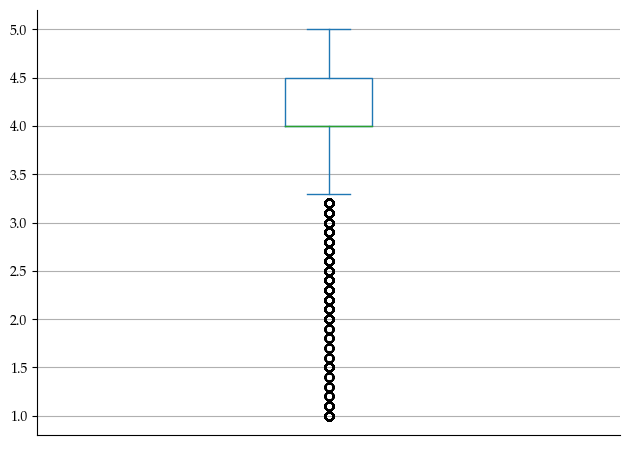

In [9]:
ax = df_rev.rating.plot(
    kind='box'
)
plt.grid(axis='y')
plt.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks([])
plt.savefig(fig_path + '/ratings_reviews_box.pdf')

AttributeError: 'list' object has no attribute 'lower'

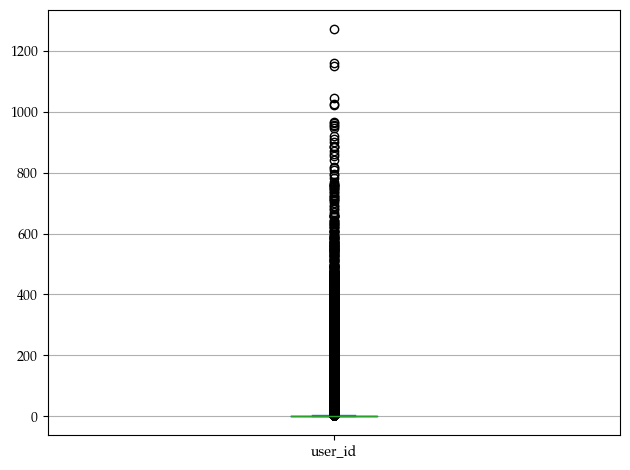

In [36]:
df_rev.user_id.value_counts().plot(
    kind='box'
)
plt.grid(axis='y')
plt.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks([])

<AxesSubplot:>

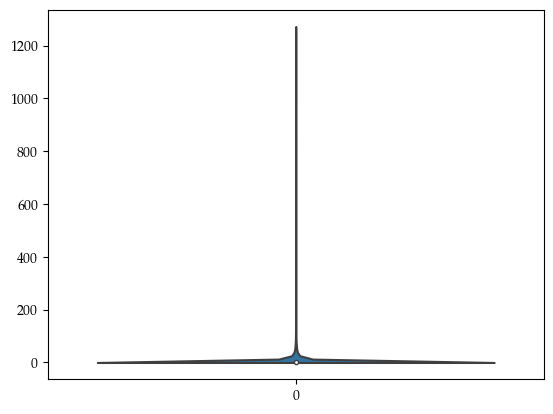

In [56]:
sb.violinplot(df_rev.user_id.value_counts())